# Sign Language MNIST Dataset

## ASL
American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well.

## The dataset
The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity.

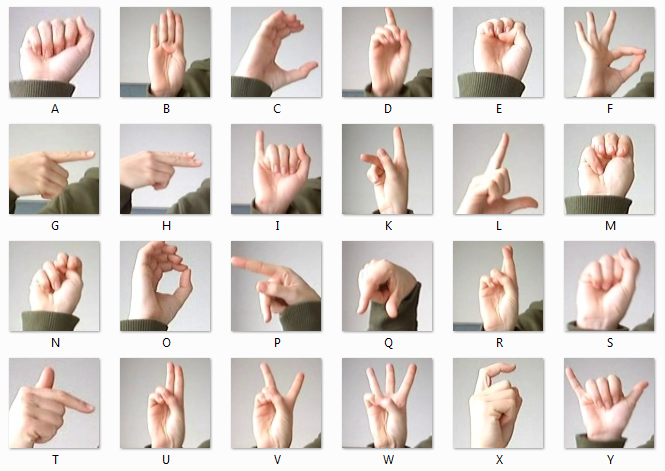

In [1]:
from IPython.display import Image
Image(filename='amer_sign2.png')

This notebook is the first part of a two notebooks project. In the other one I create a ConvNet with the same dataset. 

## Content of the notebook:

* Loading dataset.
* Data Preprocessing and quick EDA
* Machine Learning Models:
    * KNeighbors model 
    * Logistic regression model
    * Random Forest Model
    * Load CNN model (see the other notebook where I create and train it).

* Conclusion

--- 

# Loading the datasets 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
df_tr = pd.read_csv('sign_mnist_train.csv')
df_tr.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
def show_img(img, df):
    
    # Take the label
    label = df['label'][img]
    
    # Take the pixels
    pixels = df.iloc[img, 1:]

    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()


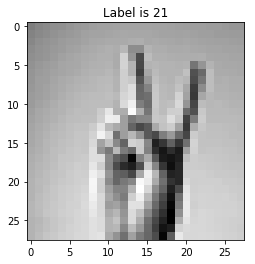

In [5]:
show_img(90, df_tr)

In [6]:
# Create train/test

X = df_tr.iloc[:,1:].values
y = df_tr['label'].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=14)

print('X_tr shape', X_tr.shape)
print('X_te shape', X_te.shape)
print('y_tr shape', y_tr.shape)
print('y_te shape', y_te.shape)

df_te = pd.read_csv('sign_mnist_test.csv')

# Create train/test

X_test = df_te.iloc[:,1:].values
y_test = df_te[['label']].values

print('X_tr shape', X_test.shape)
print('y_te shape', y_test.shape)

# convirting pixel values in range [0,1]
X_test = (X_test - 128)/255
X_tr = (X_tr - 128)/255
X_te = (X_te - 128)/255

X_tr shape (21964, 784)
X_te shape (5491, 784)
y_tr shape (21964,)
y_te shape (5491,)
X_tr shape (7172, 784)
y_te shape (7172, 1)


In [7]:
y = df_tr['label'].values
y

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

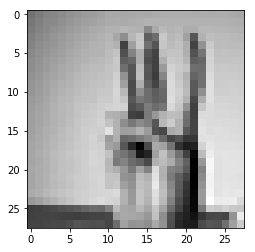

In [8]:
img = X_tr[0].reshape((28, 28))
plt.imshow(img, cmap='gray');

# Quick EDA

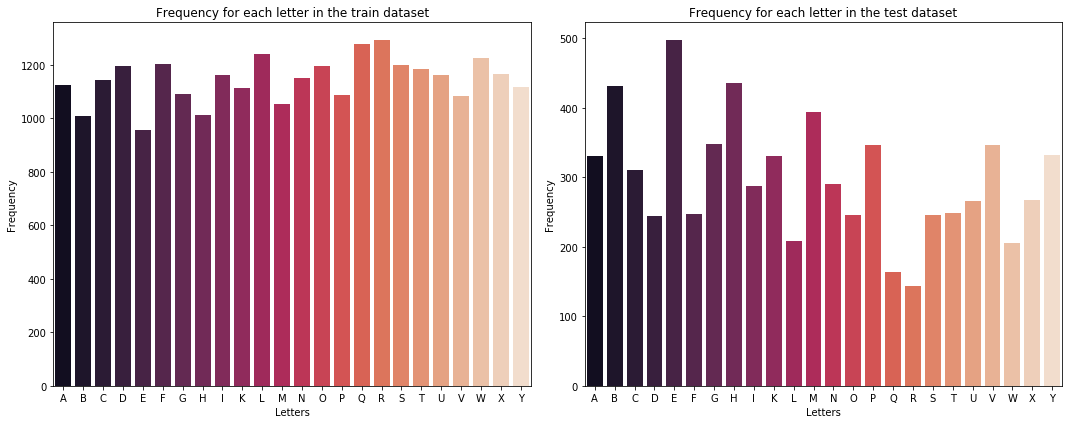

In [9]:

list_data = [df_tr, df_te]
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

for data, ax, names in zip(list_data, axes.ravel(), ['train', 'test']):
    sns.countplot(data['label'], palette='rocket', ax=ax)
    ax.set_title("Frequency for each letter in the {} dataset".format(names))
    ax.set_xlabel('Letters')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                            'T','U','V','W','X','Y'])

plt.tight_layout()

We can see that the frequency distribution is not the same between the train and test dataset.
This will affect greatly the score of the models.

<br>
<br>

---

# Machine learning models 
<br>

## 1. Create a Baseline to evaluate my models

Since we are working here with a binary classification model I will use the 'most frequent' baseline.

In [10]:
from sklearn.dummy import DummyClassifier

# Create the dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# fit it
dummy.fit(None, df_tr['label'])

# compute test accuracy
accuracy = dummy.score(None, df_tr['label'])
print('Accuracy : {:.2f}'.format(accuracy*100))

# Create a dictionnary to keep the results of the differents models
models_acc = dict()
# Save the score 
models_acc['Baseline'] = accuracy*100

Accuracy : 4.71


The accuracy is very low because the train dataset and test dataset don't have the same repartition of letters in them as we can see in the quick eda. That will also be a problem for most of my models except for the CNN.

<br>

## 2. KNeighbors model

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Create pipeline
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
    n_jobs=-1, 
    algorithm='brute'))
])

# Create cross-validation object
grid = {
    'knn__n_neighbors': np.arange(1,50,10),
}

knn_gscv = GridSearchCV(knn, grid, cv=3, n_jobs=-1, refit=True, return_train_score=True, verbose=1)

# knn.fit(X_tr, y_tr)
knn_gscv.fit(X_tr, y_tr);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 12.8min finished


In [12]:
# Collect results in a DataFrame
knn_results = pd.DataFrame({
    'k': knn_gscv.cv_results_['param_knn__n_neighbors'],
    'mean_tr': knn_gscv.cv_results_['mean_train_score'],
    'mean_te': knn_gscv.cv_results_['mean_test_score'],
    'std_te': knn_gscv.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 10 validation folds
knn_results.sort_values(by='mean_te', ascending=False).head(10)

,k,mean_tr,mean_te,std_te
0,1,1.000000,0.997268,0.000404
1,11,0.978624,0.963121,0.002727
2,21,0.941541,0.918002,0.005282
3,31,0.905118,0.880623,0.004087
4,41,0.874386,0.852486,0.005611


In [13]:
# Report test score with the validation test set taken from df_tr
print('Validation accuracy: {:.2f}%'.format(100*knn_gscv.score(X_te, y_te)))

Validation accuracy: 99.96%


In [14]:
# Test accuracy from the test dataset
print('Test dataset accuracy: {:.2f}%'.format(100*knn_gscv.score(X_test, y_test)))

# Save the score 
models_acc['k-NN'] = 100*knn_gscv.score(X_test, y_test)

Test dataset accuracy: 82.01%


Here we can see that the model have a very high accuracy with the test set taken from the original train dataset. This is again because it has the same frequency of letters in it, as opposite from the real test dataset that have a different frequency for the letters. 

              precision    recall  f1-score   support

           A       0.86      0.99      0.92       331
           B       0.96      0.94      0.95       432
           C       0.95      1.00      0.98       310
           D       0.84      0.93      0.88       245
           E       0.81      0.99      0.89       498
           F       0.99      0.95      0.97       247
           G       0.92      0.95      0.93       348
           H       0.98      0.97      0.98       436
           I       0.92      0.66      0.77       288
           K       0.85      0.60      0.70       331
           L       0.96      0.93      0.94       209
           M       0.76      0.59      0.66       394
           N       0.79      0.65      0.71       291
           O       1.00      0.93      0.96       246
           P       1.00      1.00      1.00       347
           Q       0.90      1.00      0.95       164
           R       0.35      0.58      0.44       144
           S       0.68    

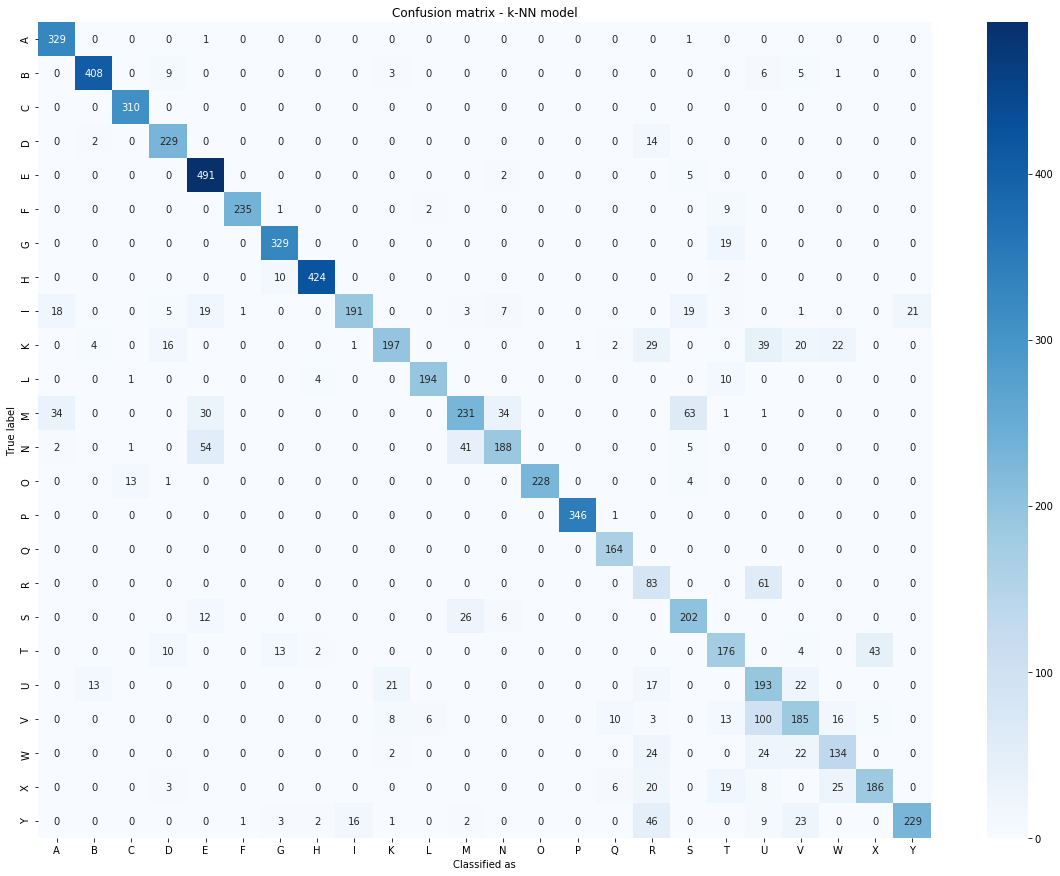

In [15]:
# Plot confusion matrix
y_pred = knn_gscv.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y']))

matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize = (20,15))
ax = sns.heatmap(matrix,cmap= "Blues", linecolor = 'black' , linewidth = 0, annot = True, fmt='', xticklabels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y'], yticklabels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y']);
ax.set(xlabel='Classified as', ylabel='True label')
plt.title('Confusion matrix - k-NN model')
plt.show()

### Pick an random image from the test set and plot it's 10 nearest neighbors from the train set

In [16]:
from sklearn.neighbors import NearestNeighbors
import random

neigh = NearestNeighbors(n_neighbors=10)

neigh.fit(X_tr)

# Choose a random number 
n = np.random.randint(0, X_test.shape[0])

# Reshape the test images taken with random number
X_te_1 = X_test[n,:].reshape(1, -1)
print('Image number {} taken. The shape of the image is: {}'.format(n, X_te_1.shape))

Image number 5641 taken. The shape of the image is: (1, 784)


In [17]:
# Take the neighboors of the test image selected
nbrs = neigh.kneighbors(X_te_1)
distance_n, indice_n = nbrs

print('Nearest neigh to taken are:', indice_n) #images of the trainset to plot
print('They are at distance:', distance_n)

Nearest neigh to taken are: [[ 1047 13129 17133  6090  3585  3821 15038 10390 14904 20538]]
They are at distance: [[1.52967318 1.64153603 1.6530284  1.67773946 1.84629683 2.00673606
  2.03339289 2.26406323 2.28495236 2.31279476]]


In [18]:
# Automaticaly takes all neightboors to plot them 
img_toplot = []

for x in indice_n:
    for i in x:
        img_toplot.append(i)
        
distance_img = []
for x in distance_n:
    for i in x:
        distance_img.append(i)

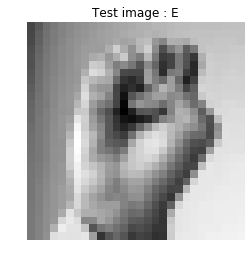

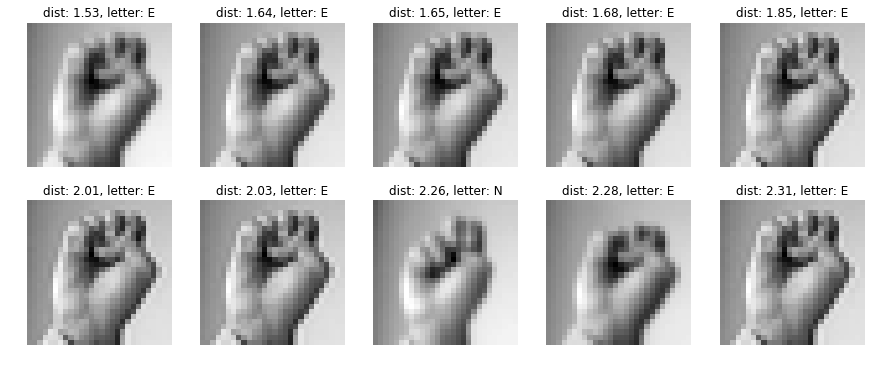

In [19]:
# Plot test image
plt.imshow(X_te_1.reshape(28,28), cmap='gray')
plt.axis('off') # hide axis
dic_numtoletters = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
                        19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y'}

plt.title('Test image : {}'.format(dic_numtoletters[int(y_test[n])]))
plt.show()

# Plot train neighboors
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for img, d, axis in zip(img_toplot, range(11), axes.flatten()):
    
    image = X_tr[img,:].reshape(28,28)

    axis.imshow(image, cmap='gray')
    axis.set_title('dist: {:.2f}, letter: {}'.format(distance_img[d], dic_numtoletters[int(y_tr[img])]))
    axis.axis('off') # hide axis


plt.show()

<br>

## 3. Logistic regression model

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [21]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Logistic regression estimator
logreg = Pipeline([
    ('scaler', StandardScaler()), # due to standardization and solvers sensitive to rescaling
    ('logreg', LogisticRegression(verbose=1, random_state=9))
])

logreg.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Validation accuracy: {:.3f}'.format(accuracy))

[LibLinear]Validation accuracy: 1.000


In [22]:
print('Test accuracy: {:.2f}%'.format(100*logreg.score(X_test, y_test)))

Test accuracy: 59.52%


### Tune its regularization strength parameter with cross-validated grid-search

In [23]:
# Logistic regression estimator
logreg = Pipeline([
    ('scaler', StandardScaler()), # due to standardization and solvers sensitive to rescaling
    ('logreg', LogisticRegression(
        verbose=1,
        n_jobs=-1,
        multi_class='multinomial', 
        solver='saga', 
        random_state=9
        ))
])

# Create cross-validation object
grid = {
    'logreg__C': np.logspace(-4, 4, num=10)
}

logreg_gscv = GridSearchCV(logreg, grid, cv=3, return_train_score=True)

In [24]:
# Fit model
logreg_gscv.fit(X_tr, y_tr);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

max_iter reached after 187 seconds


C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.1min finished


In [25]:
# Collect results in a DataFrame
logreg_results = pd.DataFrame({
    'C': logreg_gscv.cv_results_['param_logreg__C'],
    'mean_tr': logreg_gscv.cv_results_['mean_train_score'],
    'mean_te': logreg_gscv.cv_results_['mean_test_score'],
    'std_te': logreg_gscv.cv_results_['std_test_score']
})

# Ten best combinations according to the mean test score
logreg_results.sort_values(by='mean_te', ascending=False).head(10)

,C,mean_tr,mean_te,std_te
5,2.78256,0.999977,0.999727,0.000223
6,21.5443,0.999977,0.999727,0.000223
7,166.81,0.999977,0.999727,0.000223
8,1291.55,0.999977,0.999727,0.000223
9,10000,0.999977,0.999727,0.000223
4,0.359381,0.999977,0.999681,0.000171
3,0.0464159,0.999772,0.999408,0.000170
2,0.00599484,0.989893,0.986068,0.000692
1,0.000774264,0.884721,0.872245,0.004542
0,0.0001,0.709296,0.698370,0.003867


In [26]:
# Report test score
print('Test accuracy: {:.2f}%'.format(100*logreg_gscv.score(X_test, y_test)))

# Save the score 
models_acc['Logistic regression'] = 100*logreg_gscv.score(X_test, y_test)

Test accuracy: 69.90%


              precision    recall  f1-score   support

           A       0.81      1.00      0.89       331
           B       1.00      0.88      0.94       432
           C       0.90      0.87      0.89       310
           D       0.90      0.85      0.88       245
           E       0.88      0.87      0.87       498
           F       0.69      0.91      0.79       247
           G       0.83      0.77      0.80       348
           H       0.85      0.73      0.79       436
           I       0.63      0.64      0.63       288
           K       0.68      0.47      0.56       331
           L       0.65      0.89      0.75       209
           M       0.75      0.68      0.71       394
           N       0.64      0.57      0.60       291
           O       1.00      0.65      0.79       246
           P       0.97      0.97      0.97       347
           Q       0.65      0.74      0.69       164
           R       0.17      0.43      0.24       144
           S       0.39    

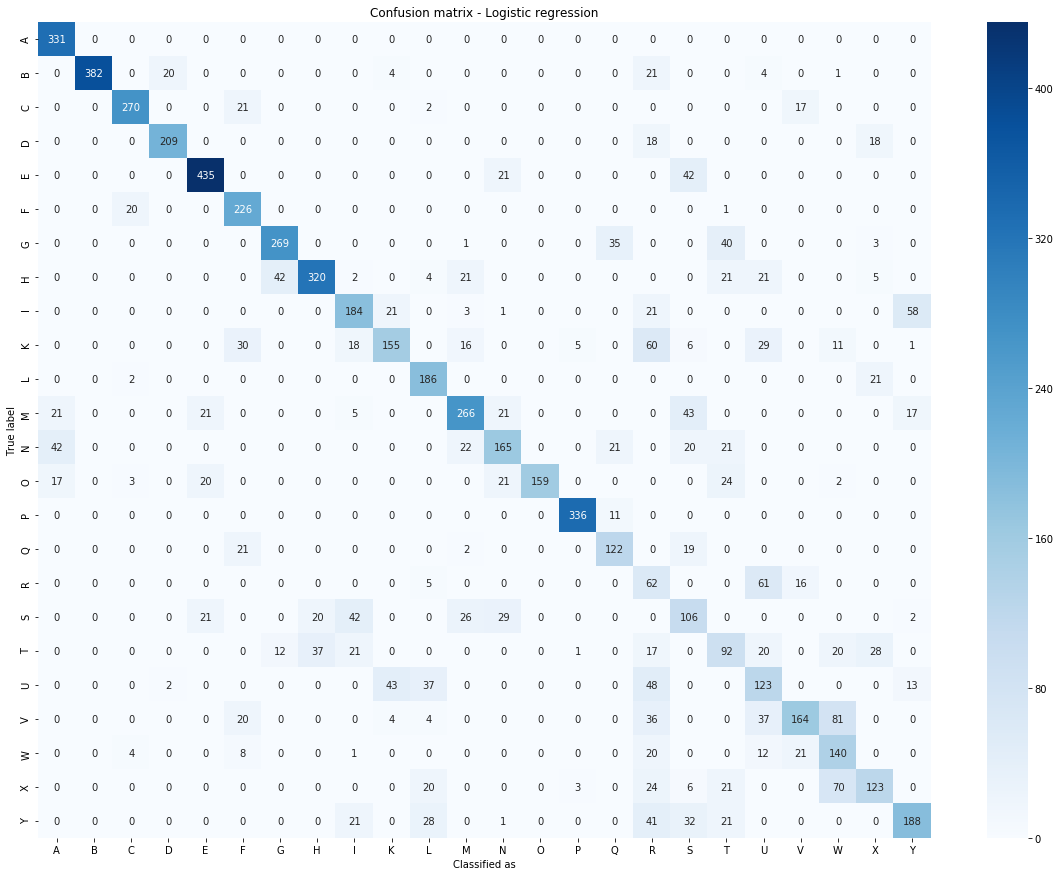

In [27]:
# Plot confusion matrix
y_pred = logreg_gscv.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y']))

matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize = (20,15))
ax = sns.heatmap(matrix,cmap= "Blues", linecolor = 'black' , linewidth = 0, annot = True, fmt='', xticklabels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y'], yticklabels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y']);
ax.set(xlabel='Classified as', ylabel='True label')
plt.title('Confusion matrix - Logistic regression')
plt.show()

### Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

random picking 10 images into between 0-21964 then use this list to run proba, plot the images and create the dataframe

In [28]:
import random

list_10 = random.choices(range(X_tr.shape[0]), k=10)

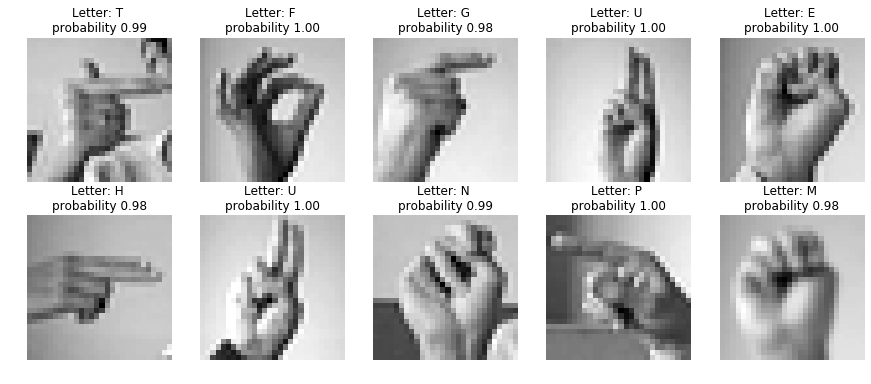

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
T,1.615292e-07,1.051276e-10,1.771792e-08,5.369740e-10,1.681741e-11,3.336732e-06,3.614108e-03,1.285558e-03,2.289121e-07,1.094837e-04,8.969759e-08,4.034115e-12,8.101304e-12,1.484702e-07,1.752528e-10,3.300336e-11,3.448870e-08,2.518588e-06,9.948149e-01,2.276113e-11,1.688723e-04,1.386347e-07,8.397093e-11,4.196799e-07
F,4.308317e-04,2.466450e-07,1.069848e-06,2.605946e-08,5.455475e-07,9.974584e-01,7.159574e-07,9.282802e-08,1.969164e-04,4.147563e-10,1.494558e-07,3.408353e-08,6.675659e-07,2.388506e-04,5.703816e-05,3.554418e-10,2.496286e-09,1.412206e-05,1.478685e-03,9.900298e-12,1.166385e-07,7.839355e-05,4.291494e-06,3.878978e-05
G,1.117489e-10,1.314182e-03,7.533730e-03,4.524234e-07,1.304547e-03,1.761291e-03,9.825732e-01,5.523932e-04,1.469254e-11,1.876629e-04,1.632321e-04,1.728131e-06,1.204228e-08,3.911322e-03,2.406098e-07,3.669931e-09,8.551980e-07,1.090668e-09,3.914368e-05,1.508135e-04,7.020024e-07,1.095028e-06,5.033777e-04,1.520901e-09
U,2.219051e-09,1.080343e-03,5.621027e-07,1.059791e-04,2.013786e-08,8.812056e-09,8.051919e-06,3.199109e-07,1.130863e-08,2.595946e-07,9.735411e-06,2.216389e-06,5.103392e-06,6.194265e-08,5.907269e-08,1.363380e-06,2.728078e-04,6.582365e-08,3.429520e-08,9.980764e-01,6.533359e-06,2.685587e-06,4.273320e-04,6.471831e-08
E,1.824154e-04,1.853366e-04,4.739697e-04,1.500857e-09,9.984366e-01,1.831836e-05,5.473735e-11,5.150077e-13,5.794423e-10,5.233114e-09,5.769909e-13,5.896065e-04,5.036029e-05,8.428125e-07,1.804125e-07,5.395419e-09,1.981310e-10,5.750438e-05,3.541847e-12,2.514046e-08,6.341355e-12,4.869173e-06,1.760846e-10,2.757381e-09


In [29]:
proba_list = []
label_list = []

# Create figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for i, axis in zip(list_10, axes.flatten()):
    
    # Take the img and reshape it
    X_1 = X_tr[i,:].reshape(1, -1)
    
    # predict the proba for that image
    proba = logreg_gscv.predict_proba(X_1)
    
    proba = proba.flatten()
    
    # Add proba to the dataframe
    proba_list.append(proba)
    max_value = np.max(proba)
    
    # Add label of the img
    label_list.append(dic_numtoletters[int(y_tr[i])])
    
    # Plot images
    
    image = X_tr[i,:].reshape(28,28)
    
    axis.imshow(image, cmap='gray')
    axis.set_title('Letter: {} \nprobability {:.2f}'.format(dic_numtoletters[int(y_tr[i])], max_value))
    axis.axis('off') # hide axis

plt.show()
       
# Create dataframe
df_proba = pd.DataFrame(proba_list, label_list, columns=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y'])
pd.set_option('display.max_columns', 25)
df_proba.head()


<br>

## 4. Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Create pipeline
randomf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_jobs=-1,
                                  verbose=1,
                                  random_state=9))
])

# Create cross-validation object
grid = {
    'rf__n_estimators':np.arange(1,501, 50),
}

rf_gscv = GridSearchCV(randomf, grid, cv=3, n_jobs=-1, refit=True, return_train_score=True, verbose=1)

# Fit the model
rf_gscv.fit(X_tr, y_tr);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 401 out of 401 | elapsed:   37.7s finished


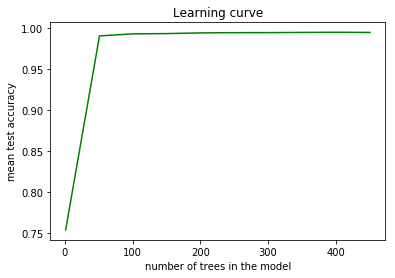

In [31]:
rf_results = pd.DataFrame({
    'trees': rf_gscv.cv_results_['param_rf__n_estimators'],
    'mean_tr': rf_gscv.cv_results_['mean_train_score'],
    'mean_te': rf_gscv.cv_results_['mean_test_score'],
    'std_te': rf_gscv.cv_results_['std_test_score']
})

plot_data = rf_results.groupby('trees').mean()

plt.plot(plot_data.index, plot_data['mean_te'], color='green')
plt.title('Learning curve')
plt.ylabel('mean test accuracy')
plt.xlabel('number of trees in the model')
plt.show()

In [32]:
# Report test score
print('Test accuracy: {:.2f}%'.format(100*rf_gscv.score(X_test, y_test)))

# Save the score 
models_acc['Random Forest'] = 100*rf_gscv.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 401 out of 401 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Test accuracy: 82.54%


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 401 out of 401 | elapsed:    0.7s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 401 out of 401 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           A       0.91      1.00      0.95       331
           B       0.98      0.94      0.96       432
           C       0.94      0.99      0.96       310
           D       0.92      0.99      0.95       245
           E       0.88      0.98      0.92       498
           F       0.93      0.91      0.92       247
           G       0.93      0.86      0.89       348
           H       0.97      0.94      0.95       436
           I       0.84      0.78      0.81       288
           K       0.75      0.69      0.72       331
           L       0.79      1.00      0.88       209
           M       0.91      0.65      0.76       394
           N       0.81      0.53      0.64       291
           O       0.97      0.86      0.91       246
           P       0.95      1.00      0.98       347
           Q       0.89      0.99      0.94       164
           R       0.32      0.61      0.42       144
           S       0.57    

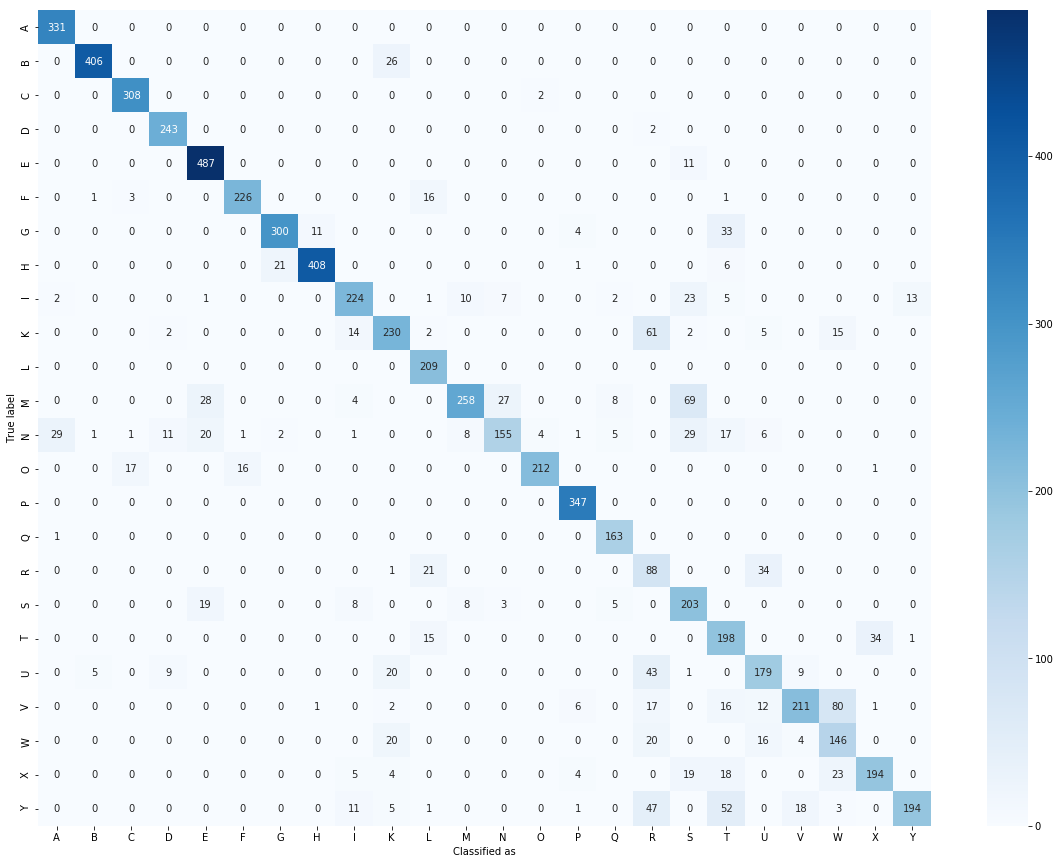

In [33]:
# Plot confusion matrix
y_pred = rf_gscv.predict(X_test)

print(classification_report(y_test, y_pred, target_names = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y']))

matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize = (20,15))
ax = sns.heatmap(matrix,cmap= "Blues", linecolor = 'black' , linewidth = 0, annot = True, fmt='', xticklabels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y'], yticklabels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S',
                        'T','U','V','W','X','Y']);
ax.set(xlabel='Classified as', ylabel='True label')
plt.show()

<br>

## 5. Load CNN model to plot the comparison

In [34]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer

# Load the model created in the second notebook here
cnn_model = keras.models.load_model('ASL_MNIST_CNN.h5')

X_test = X_test.reshape(-1, 28, 28, 1)
lb=LabelBinarizer()
y_test= lb.fit_transform(y_test)

test_loss, test_acurracy = cnn_model.evaluate(X_test, y_test)
print('Test loss: {:.2f}, accuracy: {:.2f}%'.format(test_loss, test_acurracy*100))

# Save the score 
models_acc['ConvNet'] = test_acurracy*100

7172/7172 [==============================] - 14s 2ms/step
Test loss: 0.00, accuracy: 100.00%


<br>

--- 
---
<br>

# Model comparaison and conclusion

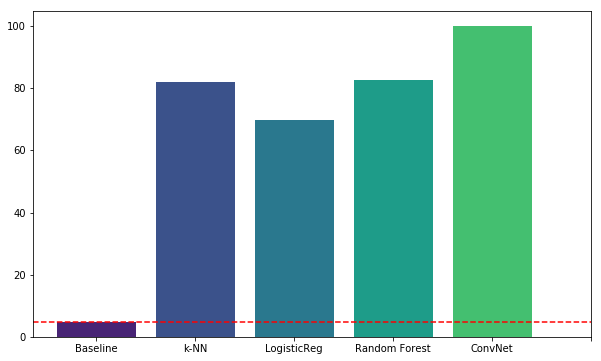

In [35]:
# I am gonne plot all my models
from matplotlib.pyplot import cm

color=cm.viridis(np.linspace(0.1,0.7, 5))
width = 0.6
models_list = ['Baseline', 'k-NN', 'LogisticReg', 'Random Forest', 'ConvNet']

plt.figure(figsize=(10, 6))
fig = plt.bar(range(len(models_acc)), list(models_acc.values()), color=color)
plt.xticks(ticks=range(6), labels=models_list)

plt.gca().axhline(float(models_acc['Baseline']), color='red', linestyle='--')
plt.show()

We can conclude that the convnet is the best model in this case, I think that if the repartition of frequency was not as different between the train and test set, we could get a very high accuracy from the other models as well.

Two solutions for this class weight imabalance could be:
* join the train and test dataset for the models and split them in a stratified way with a train/test split to have balanced train/test data
* Mesure each class imbalance and set up a ration with the class_weight tool from sklearn